In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

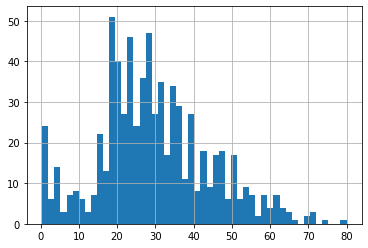

In [6]:
df.Age.hist(bins=50)

Here in this technique we are replacing the nan values by taking the values from far end i.e last part of the distribution which is seen in the histogram above.

In [8]:
df.Age.mean()

29.69911764705882

Here age column is following somewhat Normal distribution 
And in this technique mean is at centre and to replace the end values with tne vlaues at end we have to pick values lying at far end of distribution i.e at 3rd normal distribution.

In [10]:
df.Age.mean()+3*df.Age.std()

#here age values after 3rd standard deviation will have a mean of 73.27

73.27860964406095

In [11]:
#lets look at distribution of data in 'Age' column

D:\Drivers\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


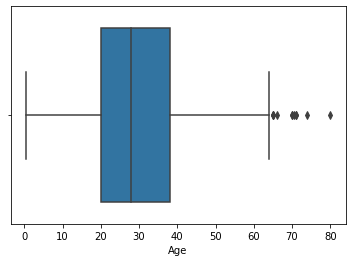

In [12]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [13]:
extreme=df.Age.mean()+3*df.Age.std()

In [14]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
    
#here in line 3 we are replacing missing value in 'Age' with median value of 'Age'
#and comparing it with end value after 3rd std deviation which is seen in column Age_end_distribution
#for output below in index 5 we see age is replaced by median=28 and age at the end of distribution is 73.27 Age_end_distribution = 73.27 

In [15]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [17]:
df.head(50)

Survived   Age      Fare  Age_end_distribution
0          0  22.0    7.2500              22.00000
1          1  38.0   71.2833              38.00000
2          1  26.0    7.9250              26.00000
3          1  35.0   53.1000              35.00000
4          0  35.0    8.0500              35.00000
5          0  28.0    8.4583              73.27861
6          0  54.0   51.8625              54.00000
7          0   2.0   21.0750               2.00000
8          1  27.0   11.1333              27.00000
9          1  14.0   30.0708              14.00000
10         1   4.0   16.7000               4.00000
11         1  58.0   26.5500              58.00000
12         0  20.0    8.0500              20.00000
13         0  39.0   31.2750              39.00000
14         0  14.0    7.8542              14.00000
15         1  55.0   16.0000              55.00000
16         0   2.0   29.1250               2.00000
17         1  28.0   13.0000              73.27861
18         0  31.0   18.0000              31.00000
19         1  28.0    7.2250              73.27861
20         0  35.0   26.0000              35.00000
21         1  34.0   13.0000              34.00000
22         1  15.0    8.0292              15.00000
23         1  28.0   35.5000              28.00000
24         0   8.0   21.0750               8.00000
25         1  38.0   31.3875              38.00000
26         0  28.0    7.2250              73.27861
27         0  19.0  263.0000              19.00000
28         1  28.0    7.8792              73.27861
29         0  28.0    7.8958              73.27861
30         0  40.0   27.7208              40.00000
31         1  28.0  146.5208              73.27861
32         1  28.0    7.7500              73.27861
33         0  66.0   10.5000              66.00000
34         0  28.0   82.1708              28.00000
35         0  42.0   52.0000              42.00000
36         1  28.0    7.2292              73.27861
37         0  21.0    8.0500              21.00000
38         0  18.0   18.0000              18.00000
39         1  14.0   11.2417              14.00000
40         0  40.0    9.4750              40.00000
41         0  27.0   21.0000              27.00000
42         0  28.0    7.8958              73.27861
43         1   3.0   41.5792               3.00000
44         1  19.0    7.8792              19.00000
45         0  28.0    8.0500              73.27861
46         0  28.0   15.5000              73.27861
47         1  28.0    7.7500              73.27861
48         0  28.0   21.6792              73.27861
49         0  18.0   17.8000              18.00000

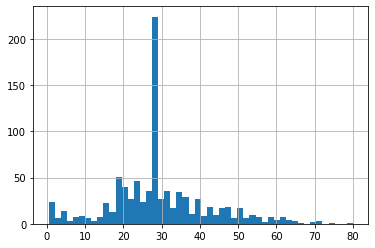

In [18]:
df['Age'].hist(bins=50)

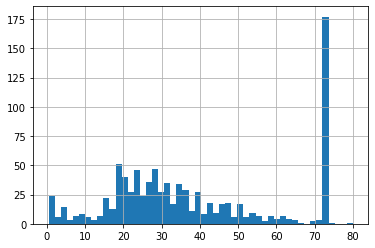

In [19]:
df['Age_end_distribution'].hist(bins=50)

D:\Drivers\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


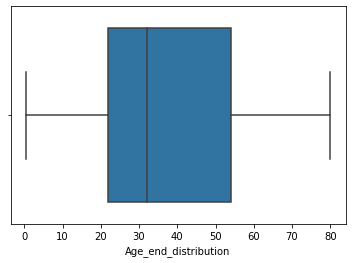

In [20]:
sns.boxplot('Age_end_distribution',data=df)

### Advantages

* Easy to implement
* Caputres the importance of missingness if there is one

### Disadvantages

* Distorts the original distribution of variable.
* If missingness is not important, it may mask the predictivew power of the original variable by distorting its distribution
* if number of NA is big,it will mask true ouytliers in the distribution
* if number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feture engineering